In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


Chargement des donnees issues des phases de pretraitement precedentes

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from posix import getcwd
import os
os.chdir("/content/drive/MyDrive/Colab_Notebooks_data/col_uterus_datas/")
getcwd()

datas=pd.read_csv("datas_via.csv",index_col=False)

Visualisation et adaptation aux besoins de l'algorithme

In [112]:
datas

,Unnamed: 0,File,Type,VIA,Paths
0,0,AFC0.jpg,Before application of acetic acid,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
1,1,AFC1.jpg,After application of acetic acid,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
2,2,AJL0.jpg,Before application of acetic acid,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
3,3,AJL1.jpg,After application of acetic acid,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
4,4,AGY0.jpg,Before application of acetic acid,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
...,...,...,...,...,...
363,363,AEU1.jpg,After application of acetic acid,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...
364,364,ADF0.jpg,Before application of acetic acid,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...
365,365,ADF1.jpg,After application of acetic acid,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...
366,366,ABK0.jpg,Before application of acetic acid,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...


In [113]:
datas=datas.drop(columns="Unnamed: 0")

In [105]:
import cv2

In [106]:
import matplotlib.pyplot as plt

Recuperation des colonnes pour faciliter l'augmentation des donnees

In [124]:
datas_selected=datas[["File","VIA","Paths"]]

**Augmentation de nos donnees**

---

1. Resizing des images de notre dataset avec OpenCv



Recuperation du repertoire actuel pour stocker les donnees augmentees dans le repertoire de nos images

In [115]:
from posix import getcwd
getcwd()

'/content/drive/MyDrive/Colab_Notebooks_data/col_uterus_datas'

Etapes de l'augmentation des donnees avec resizing

1.   Recuperation du nom, du label, et de la localisation d'un image de notre dataset
2.   Modification de la taille de cette image
3. Nommer la nouvelle image obtenue
5. Enregistrement de l'image dans notre repertoire






In [ ]:
image_size=(128,128)
images=[]
labels=[]
for i in range(len(datas)):
  image=cv2.imread(datas["Paths"][i])
  print(i)
  image=cv2.resize(image,image_size)
  label=datas.VIA[i]
  images.append(image)
  labels.append(label)

In [120]:
datas=datas.drop(326,axis=0)
datas.reset_index(drop=True,inplace=True)

In [118]:
datas.columns

Index(['File', 'Type', 'VIA', 'Paths'], dtype='object')

In [122]:
img_paths=[]
files_names=[]
labels=[]
for i in range(len(datas)):
  image=cv2.imread(datas.Paths[i])
  labels.append(datas.VIA[i])
  (height, width) = image.shape[:2]
  image=cv2.resize(image,(int(width / 2), int(height / 2)), interpolation = cv2.INTER_CUBIC)
  filename=datas.File[i][:4]+"_resized_"+".jpg"
  files_names.append(filename)
  path=getcwd()+"/"+filename
  #print(filename)
  img_paths.append(path)
  cv2.imwrite(path, image)

Ajout des nouvelles images  "resized"au niveau de notre dataset

In [ ]:
for i in range(len(datas_selected)):
  sample=[files_names[i],labels[i],img_paths[i]]
  datas_selected.loc[len(datas_selected)]=sample

**Commentaire**:

---
Apres l'operation de resizing on quitte 368 images vers 736 images dans notre dataset

**Augmentation des donnees**

---
2. Rotation des images


Etapes de l'augmentation des donnees avec rotate

1.   Recuperation du nom, du label, et de la localisation d'un image de notre dataset
2.   Faire la rotation de l'image
3. Nommer la nouvelle image obtenue
5. Enregistrement de l'image dans notre repertoire

In [126]:
img_paths=[]
files_names=[]
labels=[]
for i in range(len(datas_selected)):
  image=cv2.imread(datas_selected.Paths[i])
  labels.append(datas_selected.VIA[i])
  (rows, cols) = image.shape[:2]
  M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
  res = cv2.warpAffine(image, M, (cols, rows))
  filename=datas_selected.File[i][:4]+"_rotate_"+".jpg"
  img_path=getcwd()+"/"+filename
  #print(filename)
  files_names.append(filename)
  img_paths.append(img_path)
  cv2.imwrite(img_path, res)

Ajout des images avec rotation au niveau de notre dataset

In [127]:
for i in range(len(datas_selected)):
  sample=[files_names[i],labels[i],img_paths[i]]
  datas_selected.loc[len(datas_selected)]=sample

**Commentaire**

---

On se retrouve apres cette operation avec 1472 images dans notre dataset 

**Sauvegarde des donnees**

---

Sauvegardons l'ensemble des donnees de notre dataset dans un fichier csv pour ne pas recommencer les operations de data augmentation

In [128]:
datas_selected.to_csv("datas_pretraited.csv")

Lecture de nos donnees

In [129]:
datas_pretraited=pd.read_csv("datas_pretraited.csv")

In [131]:
datas=datas_pretraited
datas

,Unnamed: 0,File,VIA,Paths
0,0,AFC0.jpg,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
1,1,AFC1.jpg,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
2,2,AJL0.jpg,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
3,3,AJL1.jpg,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
4,4,AGY0.jpg,Negative,/content/drive/MyDrive/Colab_Notebooks_data/co...
...,...,...,...,...
1459,1459,AEU1_rotate_.jpg,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...
1460,1460,ADF0_rotate_.jpg,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...
1461,1461,ADF1_rotate_.jpg,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...
1462,1462,ABK0_rotate_.jpg,Suspicious of cancer,/content/drive/MyDrive/Colab_Notebooks_data/co...


In [141]:
datas_pretraited=datas.drop("Unnamed: 0",axis=1)
datas=datas_pretraited

Recuperation des pixels des images et des labels 

In [146]:
image_size=(128,128)
images=[]
labels=[]
for i in range(len(datas)):
  image=cv2.imread(datas["Paths"][i])
  #print(i)
  image=cv2.resize(image,image_size)
  label=datas.VIA[i]
  images.append(image)
  labels.append(label)

In [ ]:
#datas_selected.to_csv("final_dataset")

In [ ]:
#datas=pd.read_csv("final_dataset")

Transformation des listes de pixels et des labels en numpy array

In [147]:
import numpy as np
images= np.asarray(images).astype('float32')
labels=np.array(labels)

Encodage de nos labels:



1.   Negative: 0
2.   Positive: 1
3. Suspucious of cancer: 2



In [148]:
datas=datas.replace({"VIA":{
    "Negative":0,
   "Positive":1,
  "Suspicious of cancer":2
}})


In [145]:
#labels=datas["VIA"]

Visualisation de quelques images de notre dataset avec leur label encode 

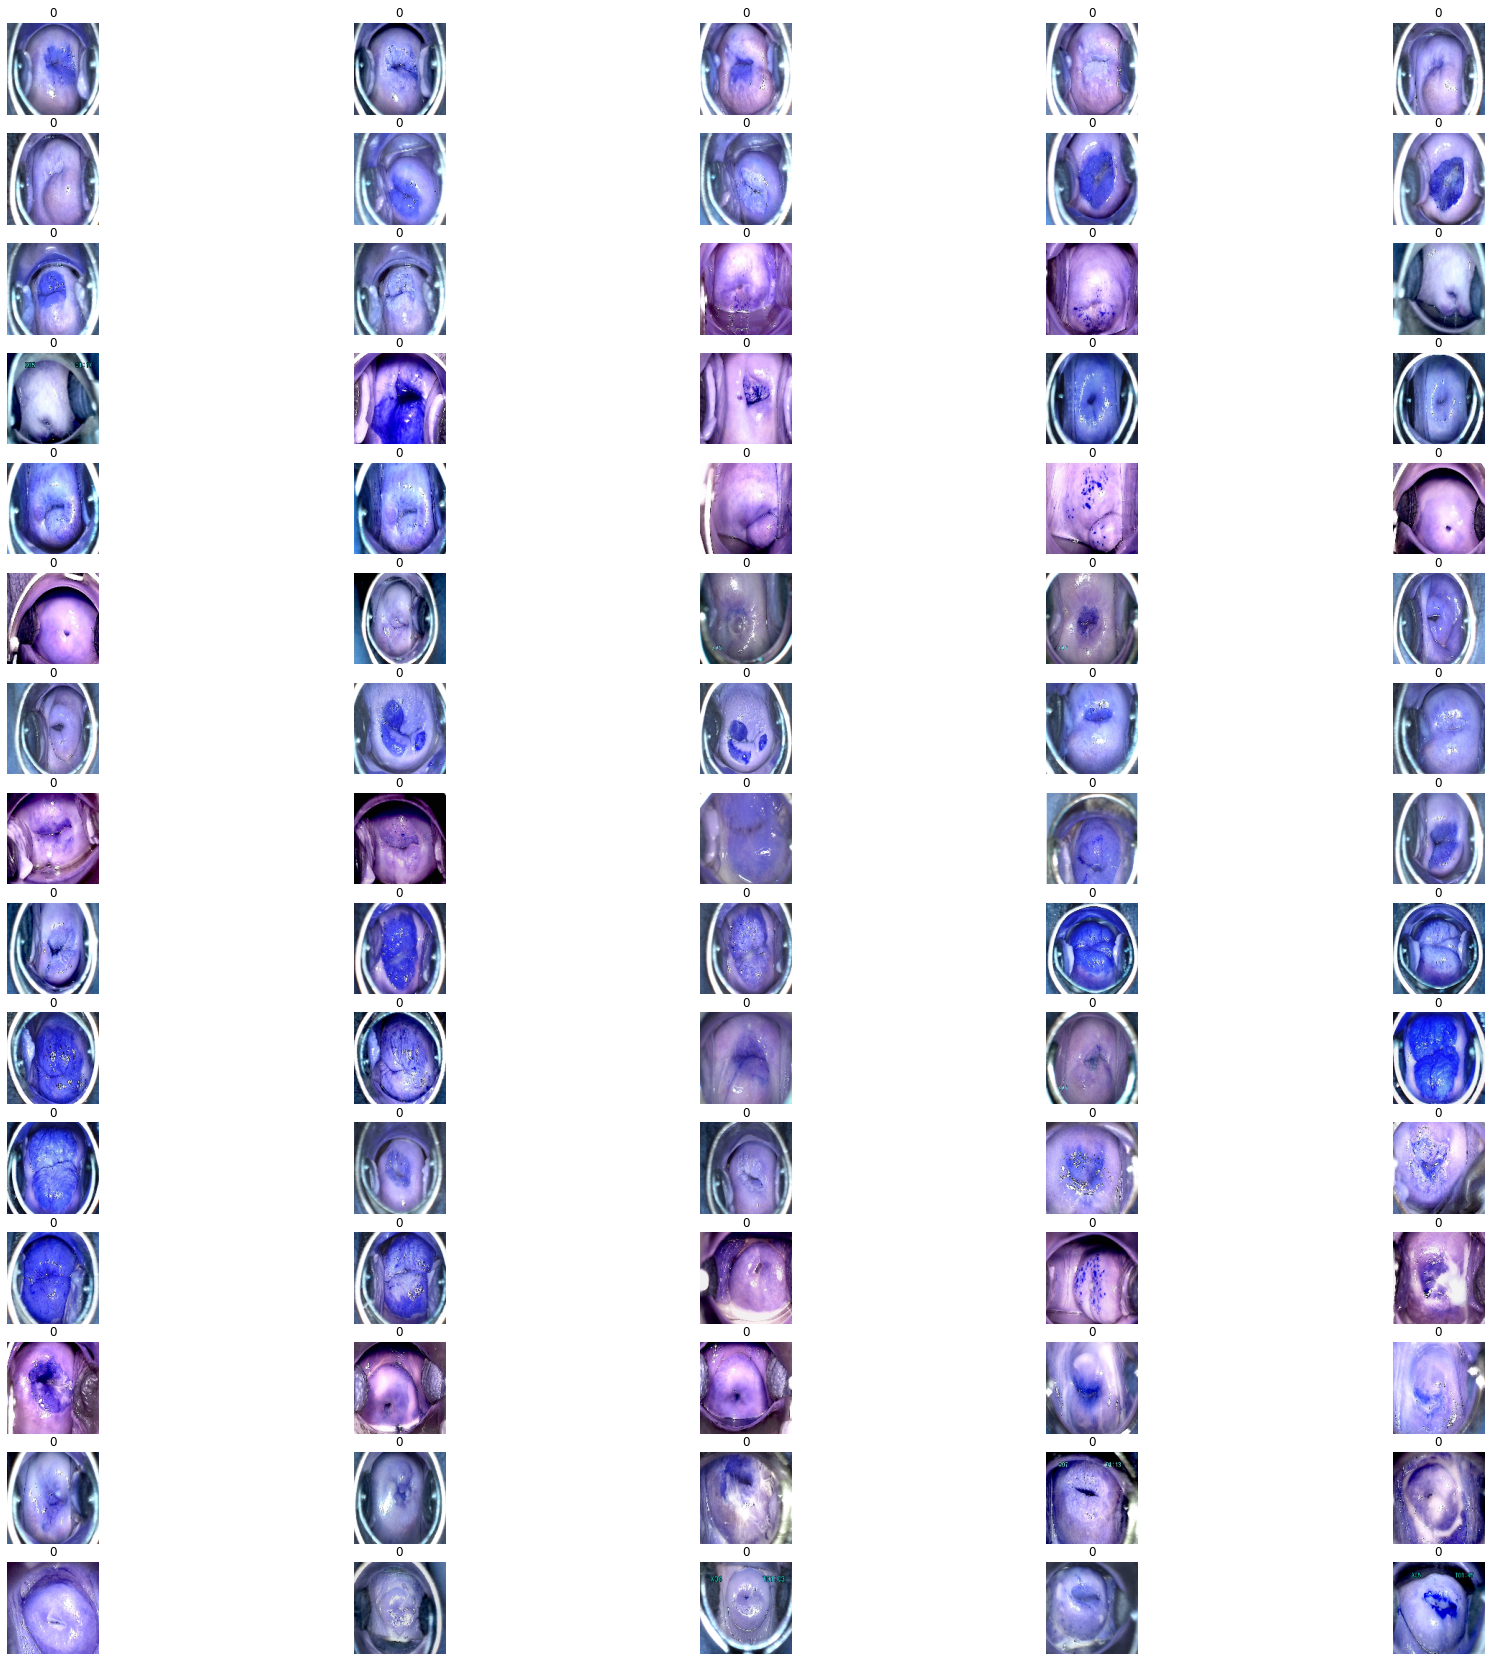

In [150]:
_, axes = plt.subplots(15,5, figsize=(30, 30))
for i, axe in enumerate(axes.flatten()):
  #print(i)
  #image=plt.imread(datas['Paths'][i])
  axe.imshow(images[i].astype('uint8'))
  axe.axis("off")
  axe.set_title(labels[i])

**Split de nos donnees en training, validation et test sets**


---



1.   60% de train
2.   20% de test
3.   20% de validation



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [151]:
from sklearn.model_selection import train_test_split


train_X,test_X,train_Y,test_Y=train_test_split(images,labels,test_size=0.4)

In [152]:
test_X,validation_X,test_Y,validation_Y=train_test_split(test_X,test_Y,test_size=0.5)

In [153]:
train_X.shape

(878, 128, 128, 3)

Vu que notre modele est une classification, les labels sont classees en 3 classes dans le test, train et validation

In [154]:
train_Y=tf.keras.utils.to_categorical(train_Y,3)

In [156]:
test_Y=tf.keras.utils.to_categorical(test_Y,3)

In [157]:
validation_Y=tf.keras.utils.to_categorical(validation_Y,3)

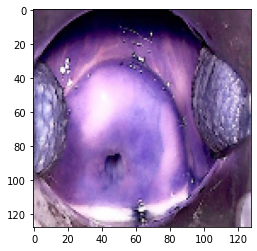

In [ ]:
plt.imshow(train_X[0].astype('uint8'))

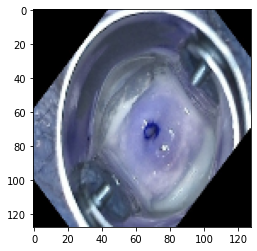

In [ ]:
plt.imshow(train_X[1].astype('uint8'))

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal",
                      input_shape=(128,
                                  128,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
train_X.shape

(878, 128, 128, 3)

Definition de notre modele avec ajout d'une couche de dropout pour eviter le surapprentissage de notre mode

In [159]:
tf.random.set_seed(2022)
model = tf.keras.Sequential([
  keras.layers.Flatten(input_shape=(128,128,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"),
    keras.layers.Dense(3,activation="softmax")
])


model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=["accuracy"])





In [160]:
history=model.fit(train_X,train_Y,validation_data=(validation_X,validation_Y),epochs=50)

Epoch 1/50
28/28 [==============================] - 3s 88ms/step - loss: 1.7106 - accuracy: 0.4909 - val_loss: 6.3502 - val_accuracy: 0.3652
Epoch 2/50
28/28 [==============================] - 2s 83ms/step - loss: 1.1845 - accuracy: 0.5900 - val_loss: 2.9443 - val_accuracy: 0.4164
Epoch 3/50
28/28 [==============================] - 2s 75ms/step - loss: 0.9464 - accuracy: 0.6583 - val_loss: 2.2403 - val_accuracy: 0.4096
Epoch 4/50
28/28 [==============================] - 2s 76ms/step - loss: 0.7403 - accuracy: 0.7062 - val_loss: 2.1533 - val_accuracy: 0.4505
Epoch 5/50
28/28 [==============================] - 2s 76ms/step - loss: 0.7040 - accuracy: 0.7267 - val_loss: 1.7560 - val_accuracy: 0.4812
Epoch 6/50
28/28 [==============================] - 2s 75ms/step - loss: 0.6087 - accuracy: 0.7449 - val_loss: 1.4267 - val_accuracy: 0.5631
Epoch 7/50
28/28 [==============================] - 2s 77ms/step - loss: 0.5700 - accuracy: 0.7665 - val_loss: 1.2269 - val_accuracy: 0.6485
Epoch 8/50
28

In [ ]:
history.history

Visualisation des courbes d'aprentissage

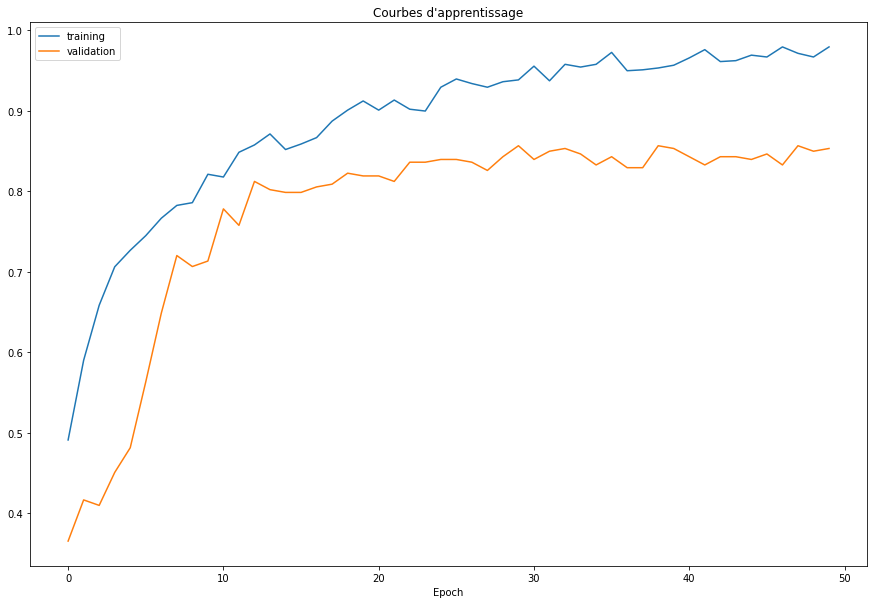

In [161]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.title("Courbes d'apprentissage")
plt.legend(['training', 'validation'], loc='upper left')

Visualisation des courbes de loss

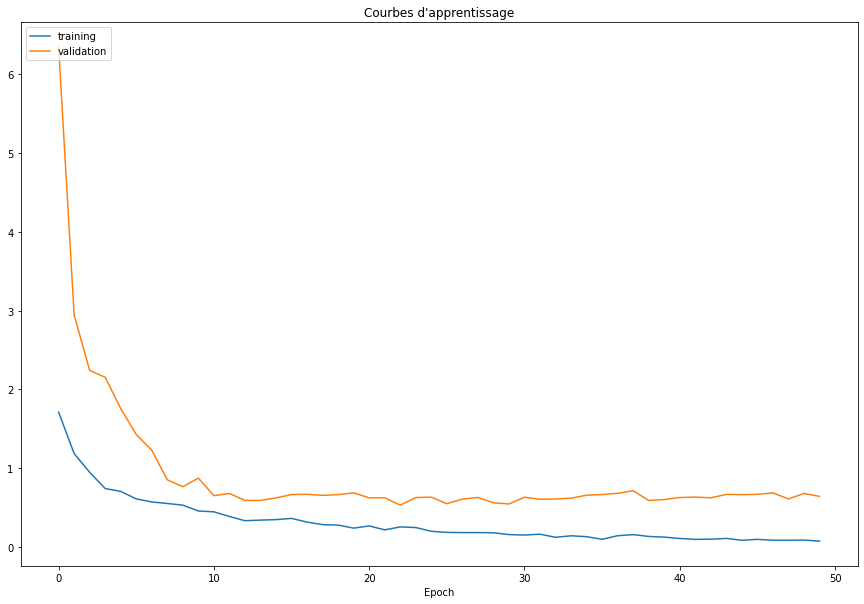

In [162]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.title("Courbes d'apprentissage")
plt.legend(['training', 'validation'], loc='upper left')

Test avec nos donnees de test avec affichage des labels des images et des labels predits par notre modele avec le score

In [ ]:
_, axes = plt.subplots(5, 10, figsize=(30, 30))
for i, axe in enumerate(axes.flatten()):
  axe.imshow(test_X[i].astype('uint8'))
  label=test_Y[i]
  label_predit=model.predict(test_X[i].reshape(1,128,128,3)).flatten().argmax()
  score=float(max(model.predict(test_X[i].reshape(1,128,128,3)).flatten()))
  print(score)
  title="ori: "+str(label.argmax())+"-"+"pred: "+str(label_predit)+"-score"+str(score)[:4]
  axe.axis("off")
  axe.set_title(title)

Enregistrement de notre modele

In [163]:
model.save("model_detection_cancer.h5")